# Import needed libraries

In [19]:
# base libraries
import numpy as np
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# data and preprocessing libraries
from sklearn.model_selection import train_test_split, GridSearchCV #Train-Test split
from sklearn import preprocessing

# model training libraries
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Error evaluation libraries
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

import warnings; warnings.simplefilter('ignore')

 # 1. Data Loading and Preprocessing

## 1.1. Read in the Dataset

In [3]:
# Read in the dataset
adults_income = pd.read_csv("./adult.csv")

# Print the dimensions of the dataset
print('Dimension: ', adults_income.shape) 
#After ames_housing_data. type tab to see all the available variables 

# Display the head of the dataset
adults_income.head()

Dimension:  (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 1.2. Checking for Missing Data

In [4]:
# Checking for missing data
missing_data = adults_income.isnull().sum()

# Filtering out only those columns which have missing data
missing_data = missing_data[missing_data > 0]

missing_data

Series([], dtype: int64)

## 1.3. Removing Rows with Missing Values
Although our dataset doesn't have any missing data, we have this code for the code to be generalizable.

In [5]:
# Removing rows with missing values
adults_income_cleaned = adults_income.dropna()

# Checking the shape of the cleaned dataset to confirm the rows were removed
adults_income_cleaned.shape

(48842, 15)

## 1.4. Check for Duplicate Rows

In [6]:
# Check for duplicate rows

print('Number of duplicate rows: ', adults_income_cleaned.duplicated().sum())

Number of duplicate rows:  52


## 1.5. Remove Duplicate Rows

In [7]:
adults_income_cleaned = adults_income_cleaned.drop_duplicates(keep='first')

adults_income_cleaned.shape

(48790, 15)

# 2. Data Visualization
Many of the data are non-numeric; however, studying their correlations matters since we have to ensure we don't have one or a predictor that can explain the income 100% of the time! Thus, we must convert every non-numerical variable into a numerical one to study their correlations.

In [8]:
adults_income_cleaned.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

## 2.1. Convert All Columns to Numeric

In [9]:
#Import label encoder
from sklearn.preprocessing import LabelEncoder

#label_encoder object 
le = LabelEncoder()

#Fit label encoder and return encoded labels
#df['A'] = df['A'].astype('category')
#df['A'] = df['A'].cat.codes

adults_income_cleaned['workclass'] = adults_income_cleaned['workclass'].astype('category')
adults_income_cleaned['workclass'] = adults_income_cleaned['workclass'].cat.codes

adults_income_cleaned['education'] = adults_income_cleaned['education'].astype('category')
adults_income_cleaned['education'] = adults_income_cleaned['education'].cat.codes

adults_income_cleaned['marital-status'] = adults_income_cleaned['marital-status'].astype('category')
adults_income_cleaned['marital-status'] = adults_income_cleaned['marital-status'].cat.codes

adults_income_cleaned['occupation'] = adults_income_cleaned['occupation'].astype('category')
adults_income_cleaned['occupation'] = adults_income_cleaned['occupation'].cat.codes

adults_income_cleaned['relationship'] = adults_income_cleaned['relationship'].astype('category')
adults_income_cleaned['relationship'] = adults_income_cleaned['relationship'].cat.codes

adults_income_cleaned['race'] = adults_income_cleaned['race'].astype('category')
adults_income_cleaned['race'] = adults_income_cleaned['race'].cat.codes

adults_income_cleaned['gender'] = adults_income_cleaned['gender'].astype('category')
adults_income_cleaned['gender'] = adults_income_cleaned['gender'].cat.codes

adults_income_cleaned['native-country'] = adults_income_cleaned['native-country'].astype('category')
adults_income_cleaned['native-country'] = adults_income_cleaned['native-country'].cat.codes

adults_income_cleaned['income'] = adults_income_cleaned['income'].astype('category')
adults_income_cleaned['income'] = adults_income_cleaned['income'].cat.codes

<function matplotlib.pyplot.show(close=None, block=None)>

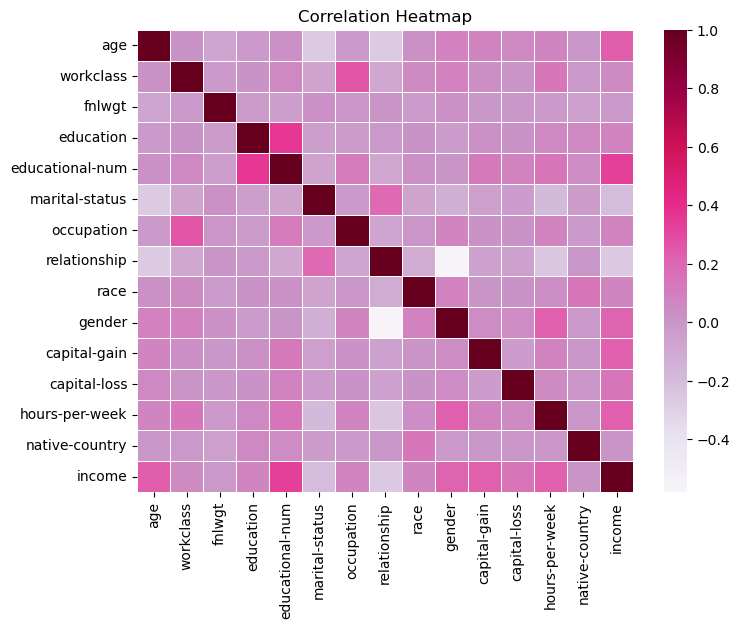

In [10]:
# Setting up the figure
plt.figure(figsize=(8, 6))

# Check correlation matrix
correlation_matrix = adults_income_cleaned.corr()

#Draw the heat map
sns.heatmap(correlation_matrix, cmap='PuRd', fmt=".5f", linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show

# 3. Data Modelling

## 3.1. Splitting the Data Set

Data Split: Train: 80\%, 39074 data points, Test: 20\%, 9768 data points

In [13]:
X = adults_income_cleaned.drop(columns=['income'])
y = adults_income_cleaned.income
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2024)

In [14]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (39032, 14)
Shape of X_test:  (9758, 14)
Shape of y_train:  (39032,)
Shape of y_test:  (9758,)


## 3.2. Scaling the data

In [21]:
scaler = preprocessing.MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

## 3.3. Implementing the Decision Tree Classifier

In [22]:
DT = DecisionTreeClassifier(random_state=2024)
DT_param = {'max_depth': np.arange(1, 15)}
DT_GS = GridSearchCV(DT, DT_param, cv=5)
DT_GS.fit(X_train_scaled, y_train)
DT_GS.best_estimator_

DecisionTreeClassifier(max_depth=7, random_state=2024)

## 3.4. Visualizing the Tree

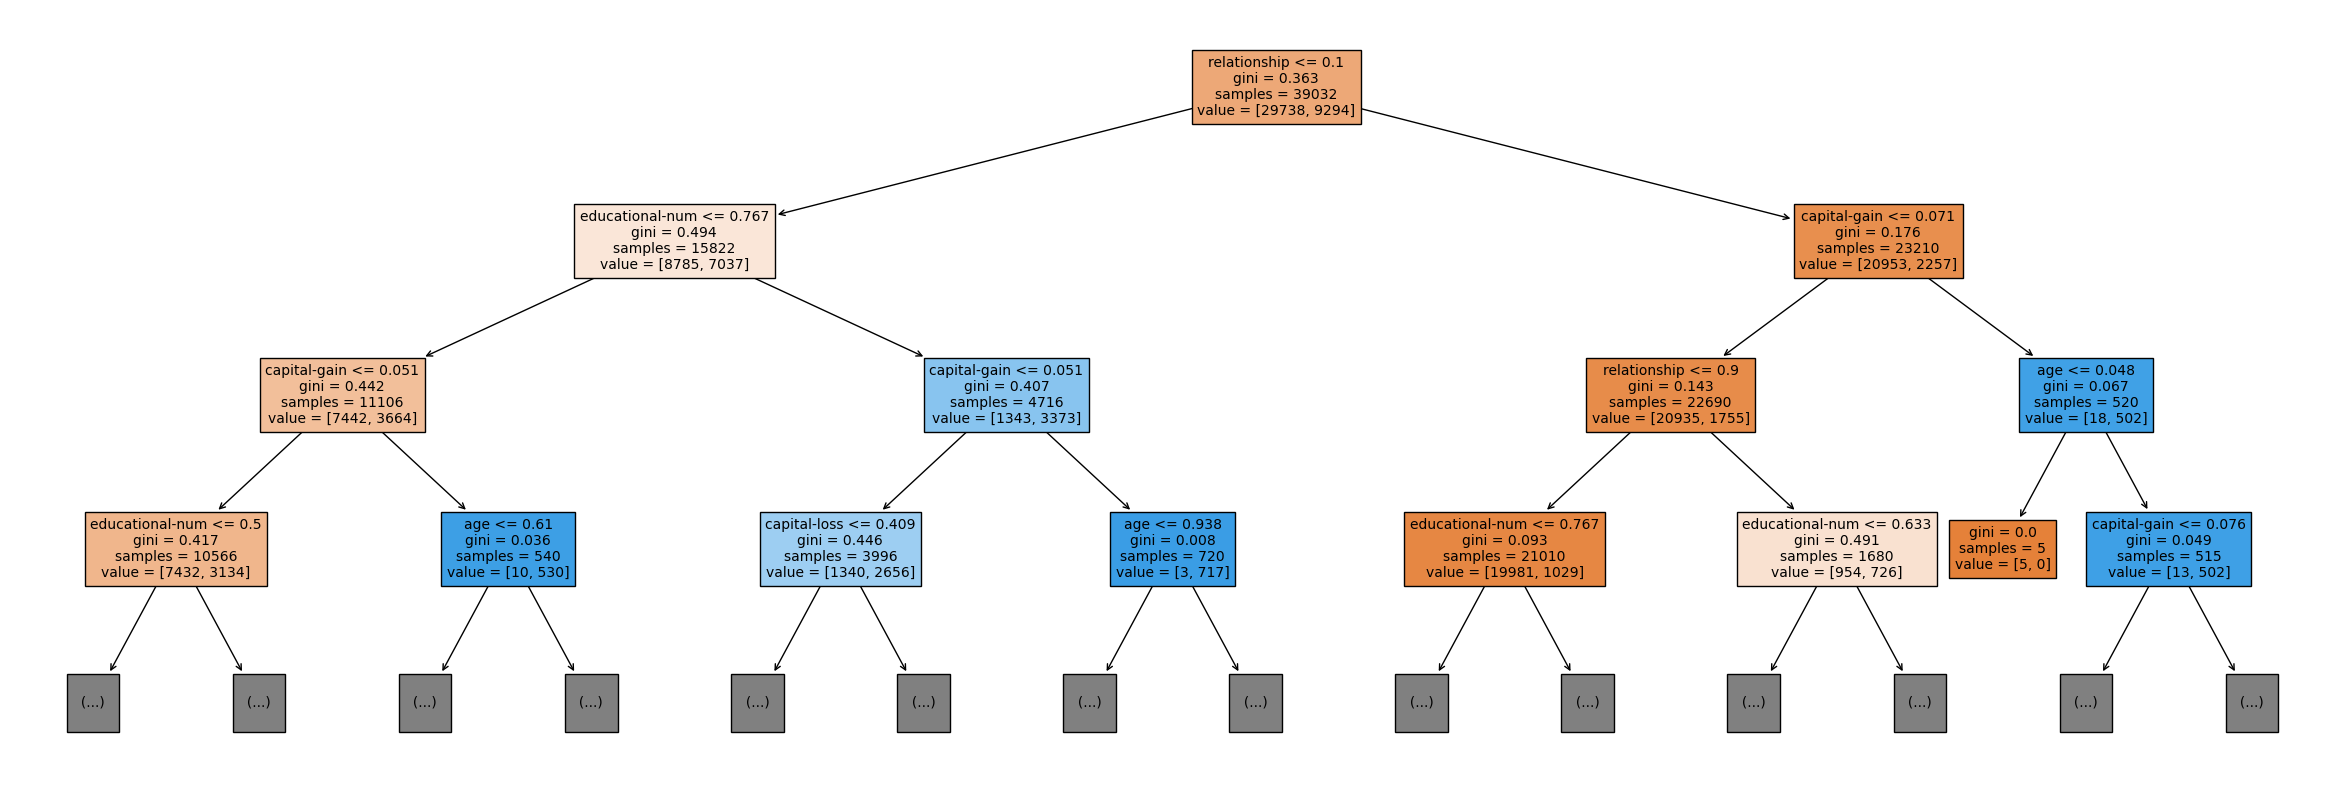

In [38]:
plt.figure(figsize=(30,10))

plot_tree(DT_GS.best_estimator_, filled=True, feature_names=X_train.columns, max_depth=3, fontsize=10)

plt.show()

## 3.5. Prediction and Model Evaluation

In [39]:
DT_preds = DT_GS.predict(X_test_scaled)
print("Test accuracy:", accuracy_score(DT_preds, y_test))
print("Training accuracy:", accuracy_score(DT_GS.predict(X_train_scaled), y_train))

Test accuracy: 0.8453576552572248
Training accuracy: 0.8589618774339004


## 3.6. The effect of max-depth
We can see the effect of max_depth on overfitting

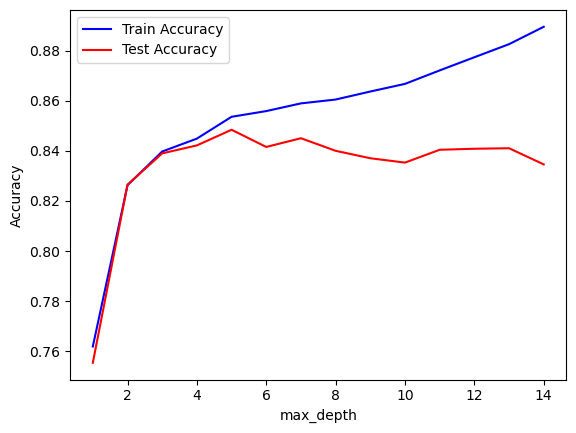

In [40]:
maxdepth = np.arange(1,15)
train_results = []
test_results = []

for m in maxdepth:
    model = DecisionTreeClassifier(max_depth=m, random_state=2023)
    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(train_pred, y_train)
    train_results.append(train_accuracy)
    test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(test_pred, y_test)
    test_results.append(test_accuracy)

plt.plot(maxdepth, train_results, 'b', label='Train Accuracy')
plt.plot(maxdepth, test_results, 'r', label='Test Accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.show()

## 3.7. Confusion matrix

In [41]:
print(confusion_matrix(DT_preds, y_test))

[[7022 1160]
 [ 349 1227]]


## 3.8. Classification report

In [42]:
print(classification_report(DT_preds, y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      8182
           1       0.51      0.78      0.62      1576

    accuracy                           0.85      9758
   macro avg       0.73      0.82      0.76      9758
weighted avg       0.88      0.85      0.86      9758

